In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [128]:
dataset = pd.read_csv("dataset/healthcare-dataset-stroke-data.csv")

In [129]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [130]:
dataset = dataset.drop(['id'], axis=1)
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [131]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [133]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [137]:
# BMI feature has NaN object

bmi_mean = dataset.describe().bmi['mean']
dataset.bmi = dataset.bmi.fillna(bmi_mean)
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [135]:
print(dataset.gender.unique())
print(dataset.ever_married.unique())
print(dataset.work_type.unique())
print(dataset.Residence_type.unique())
print(dataset.smoking_status.unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [136]:
# Labeling

from sklearn.preprocessing import LabelEncoder
dataset.gender = LabelEncoder().fit_transform(dataset.gender)
dataset.ever_married = LabelEncoder().fit_transform(dataset.ever_married)
dataset.work_type = LabelEncoder().fit_transform(dataset.work_type)
dataset.Residence_type = LabelEncoder().fit_transform(dataset.Residence_type)
dataset.smoking_status = LabelEncoder().fit_transform(dataset.smoking_status)

dataset.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,NaN,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


# Visualizing

In [232]:
dataset.avg_glucose_level

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [139]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

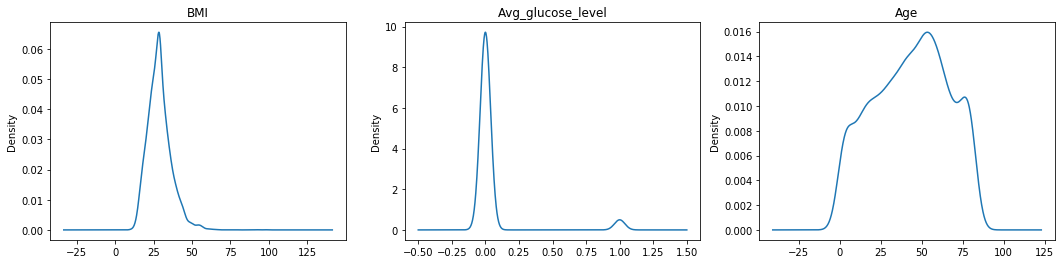

In [138]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title('BMI')
dataset.bmi.plot.kde()
plt.subplot(1,3,2)
plt.title("Avg_glucose_level")
dataset.stroke.plot.kde()
plt.subplot(1,3,3)
plt.title("Age")
dataset.age.plot.kde()

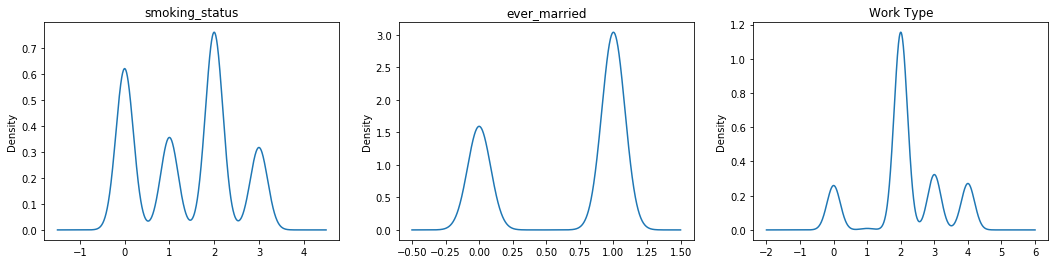

In [140]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title('smoking_status')
dataset.smoking_status.plot.kde()
plt.subplot(1,3,2)
plt.title("ever_married")
dataset.ever_married.plot.kde()
plt.subplot(1,3,3)
plt.title("Work Type")
dataset.work_type.plot.kde()


In [197]:
corr = dataset.corr()
corr.stroke

gender               0.008929
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
work_type           -0.032316
Residence_type       0.015458
avg_glucose_level    0.131945
bmi                  0.038947
smoking_status       0.028123
stroke               1.000000
Name: stroke, dtype: float64

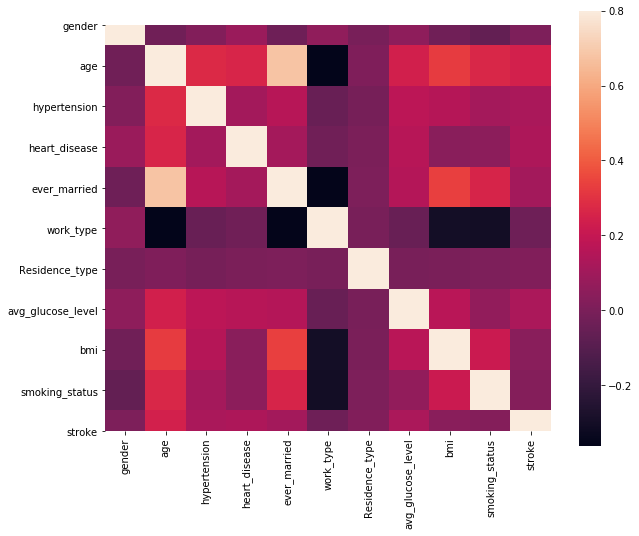

In [200]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=.8, square=True);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


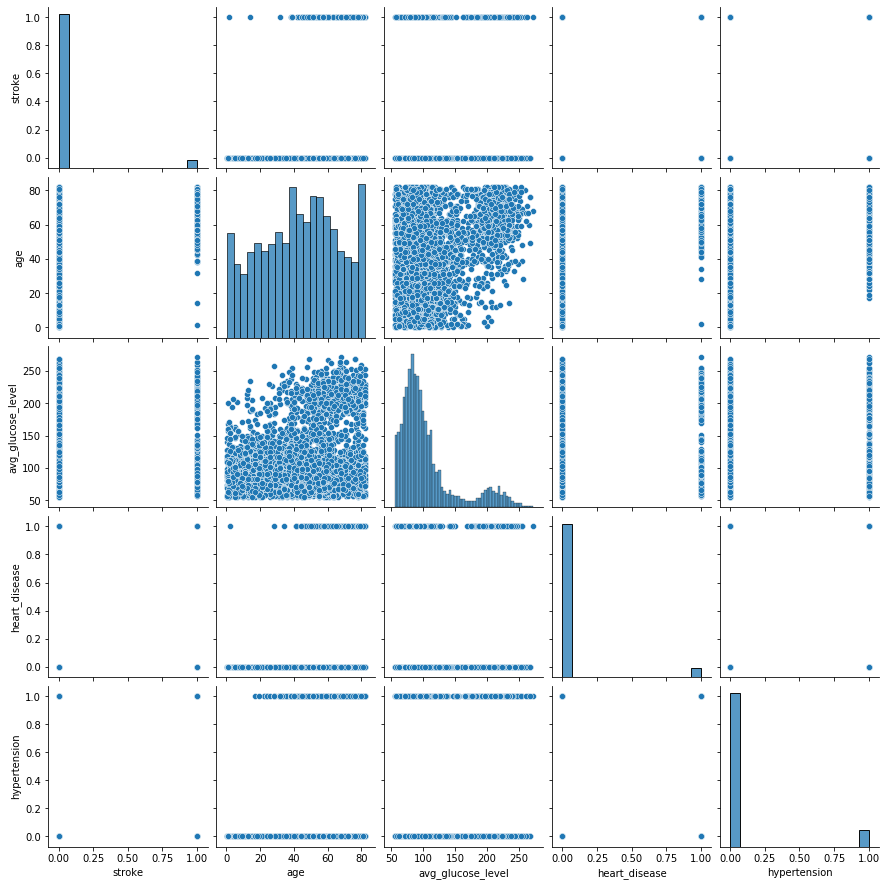

In [159]:
## 상위 4개만 가지고 실험

df2 = dataset[['stroke', 'age', 'avg_glucose_level', 'heart_disease','hypertension']]
sns.pairplot(df2, size = 2.5)

In [211]:
df2 = dataset[['stroke', 'age', 'avg_glucose_level', 'heart_disease','hypertension']]
y = df2.stroke.values
df2 = df2.drop(['stroke'], axis=1)
X = df2.values

In [217]:
df2.head(5)

,age,avg_glucose_level,heart_disease,hypertension
0,67.0,228.69,1,0
1,61.0,202.21,0,0
2,80.0,105.92,1,0
3,49.0,171.23,0,0
4,79.0,174.12,0,1


In [218]:
X, y

(array([[ 67.  , 228.69,   1.  ,   0.  ],
        [ 61.  , 202.21,   0.  ,   0.  ],
        [ 80.  , 105.92,   1.  ,   0.  ],
        ...,
        [ 35.  ,  82.99,   0.  ,   0.  ],
        [ 51.  , 166.29,   0.  ,   0.  ],
        [ 44.  ,  85.28,   0.  ,   0.  ]]), array([1, 1, 1, ..., 0, 0, 0]))

In [222]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

# Random Forest Classifier

In [223]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500)

In [224]:
rfc.score(test_X,test_y)

0.9386823222439661

# SGD Classifier

In [225]:
from sklearn.linear_model import SGDClassifier

In [226]:
sgd = SGDClassifier()
sgd.fit(train_X,train_y)

SGDClassifier()

In [227]:
sgd.score(test_X,test_y)

0.9452054794520548

# KNN Classifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [230]:
knn.score(test_X,test_y)

0.9412915851272016

# Scaling
- Stochastic Gradient Descent learning 이 가장 높은 score를 보였다.
- feature scaling 이후 결과도 비교해 본다.